# Лабораторная работа №2
## Визуальный анализ данных

### Подключение библиотек

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Загрузка данных

In [ ]:
data_path = "imports-85.data"
data = pd.read_csv(data_path)
data.head(10)
# data.columns

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Одиночные признаки
#### Количественные признаки

In [ ]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

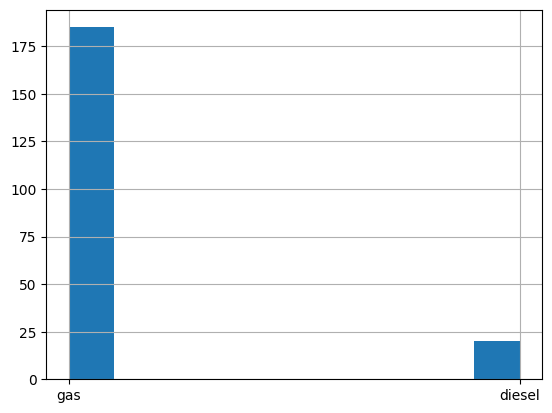

In [ ]:
# Применение pandas для визуализации данных
# Pandas работает как настройка над matplotlib
data['fuel-type'].hist();

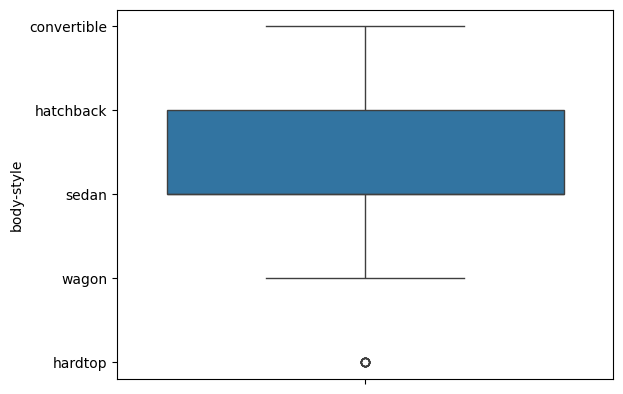

In [ ]:
# использование Seaborn
# Построение диаграммы типа "ящик с усами"
# по диаграмме можно определить медиану, квартили,
# интерквартильный размах, выбросы
sns.boxplot(data['body-style']);

<ipython-input-39-f89c25b05b37>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='horsepower',


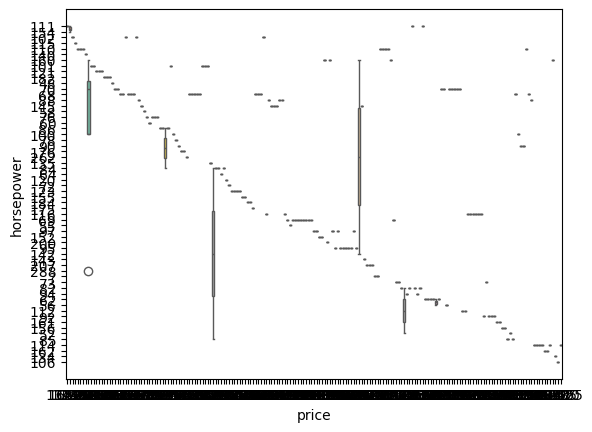

In [ ]:
top_data = data[['horsepower','price']]
top_data = top_data.groupby('horsepower').sum()
top_data = top_data.sort_values('price',ascending=False)
top_data = top_data.index.values
sns.boxplot(y='horsepower',
            x='price',
            data=data[data.horsepower.isin(top_data)], palette='Set2');

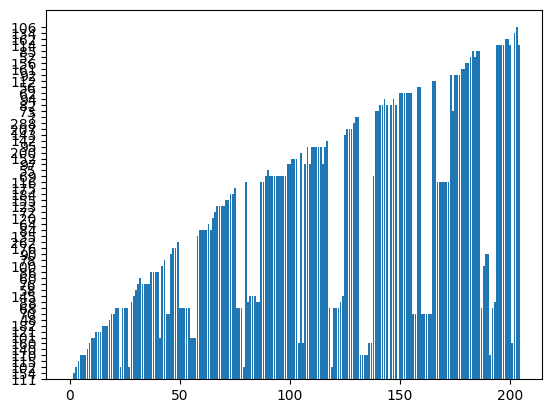

In [ ]:
plt.bar(data.index, data['horsepower'])
plt.show()

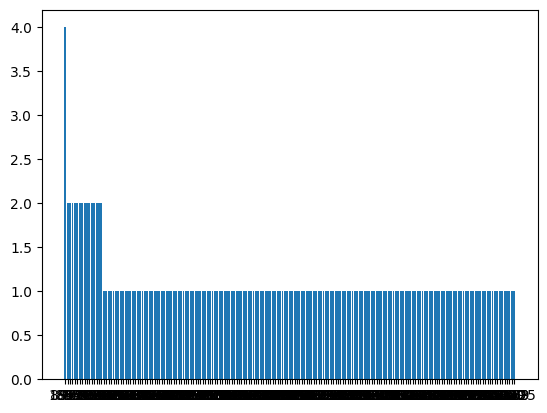

In [ ]:
hist = data['price'].value_counts()
plt.bar(hist.index, hist);

In [ ]:
# от признаков
feats=[f for f in data.columns if 'wheel' in f]
feats

['drive-wheels', 'wheel-base']

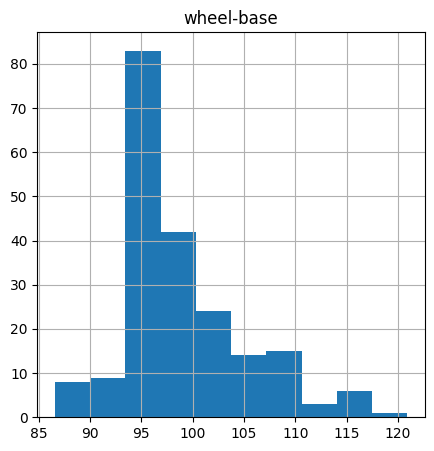

In [ ]:
# построение гистограммы для нескольких признаков
data[feats].hist(figsize=(5,5));

### Категориальные признаки

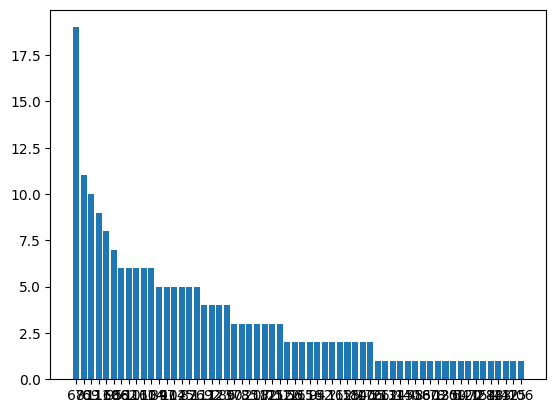

In [ ]:
# определение первых n "популярных" штатов
# data['horsepower'].value_counts().head(10)
hist = data['horsepower'].value_counts()
plt.bar(hist.index, hist);


In [ ]:
# фактически бинарный признак
data['price'].value_counts()

price
?        4
8921     2
18150    2
8845     2
8495     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: count, Length: 187, dtype: int64

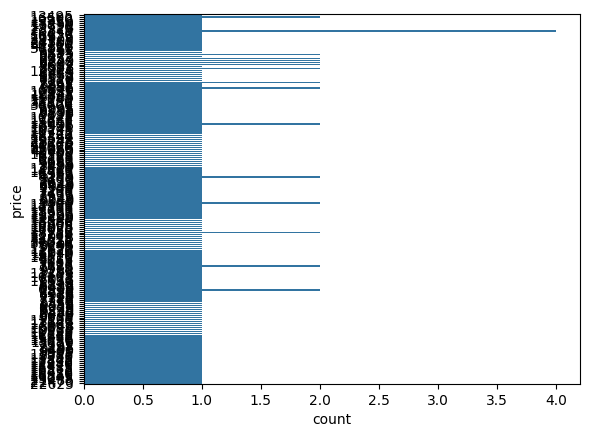

In [ ]:
sns.countplot(data['price']);

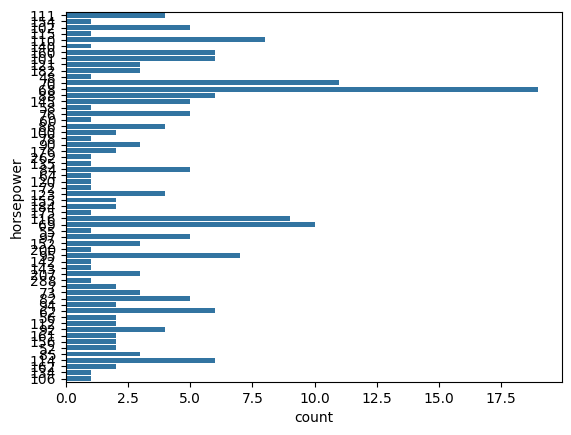

In [ ]:
# гистограмма для всех штатов
sns.countplot(data['horsepower']);

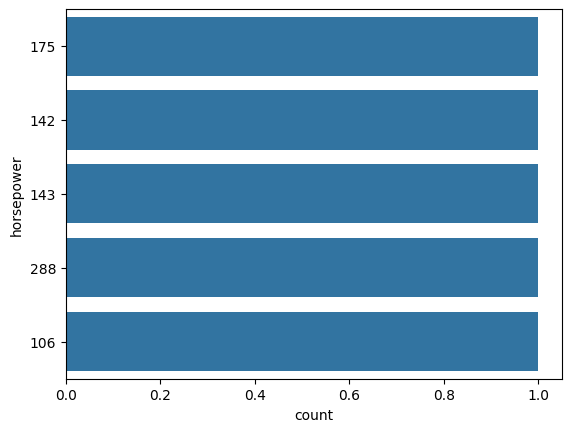

In [ ]:
# гистограмма "популярных" штатов
sns.countplot(data[data['horsepower'].isin(data['horsepower'].value_counts().tail(5).index)]['horsepower']);

### Взаимосвязанные признаки
#### Количественный - количественный

In [ ]:
# список колонок
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
# Отбор числовых признаков, содержащих слово 'charge'
feats = [f for f in data.columns if 'wheel' in f]
len(feats)

2

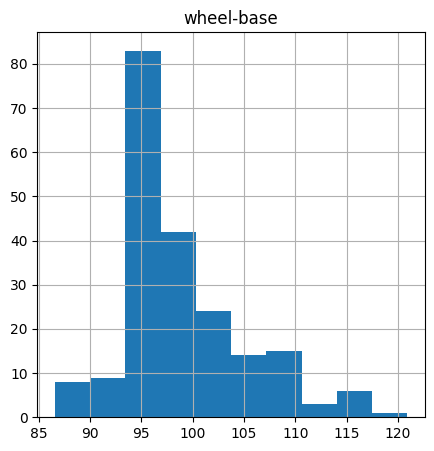

In [ ]:
# строим отдельные гистограммы
# для нескольких признаков
data[feats].hist(figsize=(5,5));

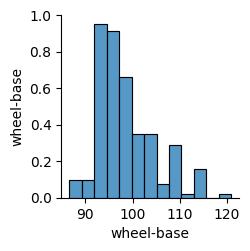

In [ ]:
# Попарное распределение признаков
# Применение Seaborn
sns.pairplot(data[feats]);

Можно строить более сложные попарные распределения признаков

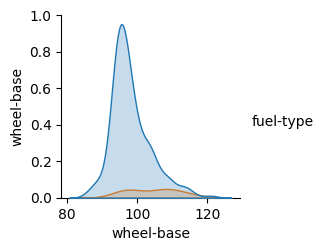

In [ ]:
sns.pairplot(data[feats + ['fuel-type']], hue='fuel-type');

Использование matplotlib, подписей данных, заголовков
Использование простейших пользовательских цветов

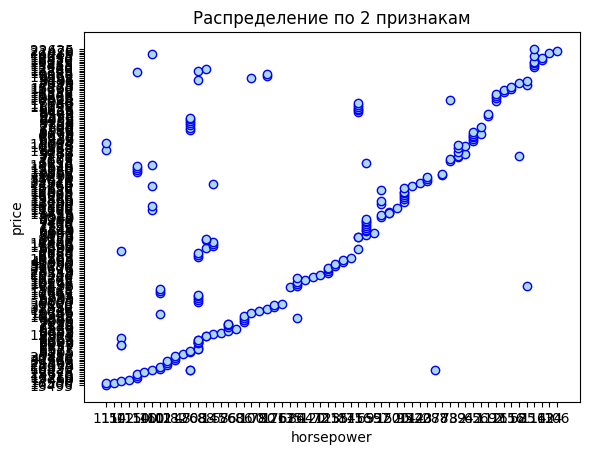

In [ ]:
plt.scatter(data['horsepower'],
            data['price'],
            color='lightblue', edgecolors='blue')
plt.xlabel('horsepower')
plt.ylabel('price')
plt.title('Распределение по 2 признакам');

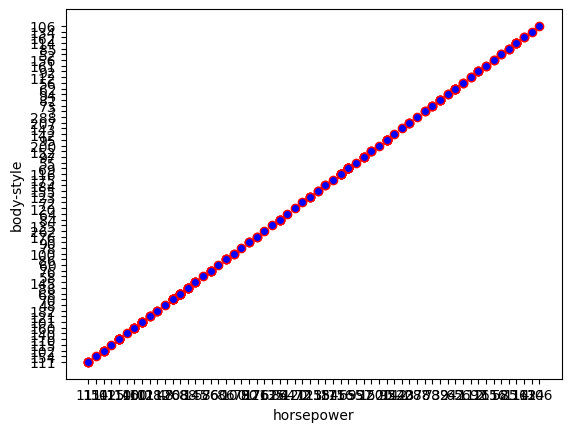

In [ ]:
# Раскрашивание данных
# Цвет в зависимости от ухода клиента
c = data['body-style'].map({False: 'lightblue', True: 'orange'})
edge_c = data['body-style'].map({False: 'blue', True: 'red'})
# Настройка графика
plt.scatter(data['horsepower'], data['horsepower'],
            color="blue", edgecolors="red"
           )
plt.xlabel('horsepower')
plt.ylabel('body-style');